<a href="https://colab.research.google.com/github/snghynn/summ/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_4%2C6%2C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 딥러닝 텐서플로 pg. 87 ~ 95, 105 ~ 115 필사

## 3.4 모델 세부 설정

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#로드된 데이터셋 확인
print('train set:' , x_train.shape, y_train.shape)
print('test set:' , x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train/ x_train.max()  # max:255
x_test = x_test / x_test.max()    # max: 255

11490434/11490434 [==============================] - 0s 0us/step
train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


## 4-1 초기값 설정
- 레이어의 초기화 방법을 다르게 설정
- Dense 레이어: 기본 초기화 방법으로 Glorot Uniform 초기화 방법이 설정되어 있음

In [2]:
dense = tf.keras.layers.Dense(236, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

- 기본 설정된 GlorotUniform 초기화 방법을 HeNormal로 변경하기 위해서 kernel_initializer 매개변수에 설정
- 문자열로 지정
- 클래스 인스턴스로 지정

In [3]:
# mtd1) 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# mtd2) 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal,activation='relu')
print(dense.get_config()['kernel_initializer'])

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


## 4-2 규제(Regularization)
- 모델 과대적합 해소 위해 L1, L2 규제 적용
- 텐서플로 케라스 레이어는 기본값으로 규제 적용 X

In [4]:
# 기본값
dense=tf.keras.layers.Dense(256,activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

> kernel_constraint : None으로 설정되어 있음
-> 레이어에 규제 위해서는 별도 설정 필요

- 모델 과대적합 방지 위해 모델을 구성하는 레이어마다 규제를 적용할 수 있음
- 케라스에서 지원하는 규제: L1, L2 규제
- kernel_regularizer에 규제를 지정하면 됨

In [5]:
# l1 규제
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용 , alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


## 4-3 드롭아웃
- 딥러닝 모델의 층이 넓고 깊어질 때(wide-and-deep) 모델은 훈련에 주어진 샘플에 과하게 적합하도록 학습하는 경향이 있음
- 이에 새로운 데이터에 대해서는 좋지 않은 예측력을 보일 때가 많음
- 훈련 데이터셋에 과대적합
- 드롭아웃: 모델의 과대적합 문제를 해결하기 위해 제안된 아이디어. 효과 good


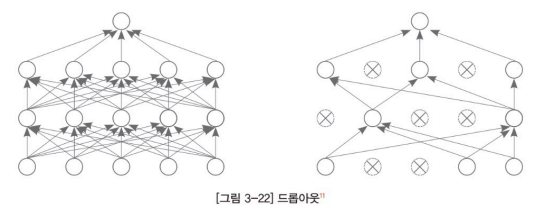


- 오른쪽 그림은 모든 노드가 연결되지 않고 확률적으로 몇 개의 신호는 끊겨 있음
- 노드의 일부 신호를 임의로 삭제해 모델의 과대적합 방지
- 모델이 학습하는 가중치 파라미터의 개수가 줄어들기 때문
- 모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하지만, 예측 시점에는 모든 노드들이 활용됨

In [6]:
# dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

## 4-4 배치 정규화(Batch Normalization)

- 배치 정규화: 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일 정규화
- 다음 층으로 데이터가 전달되기 전에 스케일을 조정하기 때문에 안정적인 훈련, 성능 향상 가능
- model_a: Dense 레이어에 ReLU 활성화 함수 추가한 모델
- model_b: 배치 정규화 적용 후 ReLU 활성화 함수 추가한 모델

In [7]:
# Model A : Dense + ReLU
model_a = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')

])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

< 동일한 조건에서 10번의 epoch동안 model_a, model_b 두 모델을 훈련한 결과 >

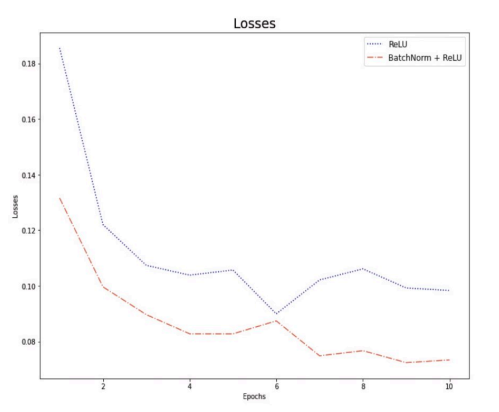


> - 배치 정규화만 추가하였는데 손실은 이전 대비 더 안정적이고 빠르게 수렴
- 데이터 개수가 적은 데이터셋에서는 큰 차이를 보이지 않을 수 있음
- 크고 복잡한 데이터셋에서는 배치 정규화 유무가 모델 성능에 크게 영향을 미치는 경우도 있으므로 배치 정규화를 적극 적용해볼 필요가 있음

## 4-5 활성화(activation) 함수

In [9]:
## 활성화 함수를 클래스 인스턴스로 선언
#LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [10]:
#model C: Dense + BatchNorm + LeakyReLU(0,2)
model_c=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                     

In [11]:
## model a,b,c를 동일한 조건으로 10번의 epoch동안 훈련한 후 수렴 속도 확인
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Model A : Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model B : Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)
#Model C : Dense + BatchNorm + LeakyReLU(0,2)
history_c = model_c.fit(x_train, y_train,
                      validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2903 - accuracy: 0.9177 - val_loss: 0.1515 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1295 - accuracy: 0.9610 - val_loss: 0.1198 - val_accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0934 - accuracy: 0.9722 - val_loss: 0.1107 - val_accuracy: 0.9661
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0724 - accuracy: 0.9780 - val_loss: 0.0908 - val_accuracy: 0.9716
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0602 - accuracy: 0.9812 - val_loss: 0.0900 - val_accuracy: 0.9721
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0500 - accuracy: 0.9841 - val_loss: 0.0995 - val_accuracy: 0.9705
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0856 - val_accu

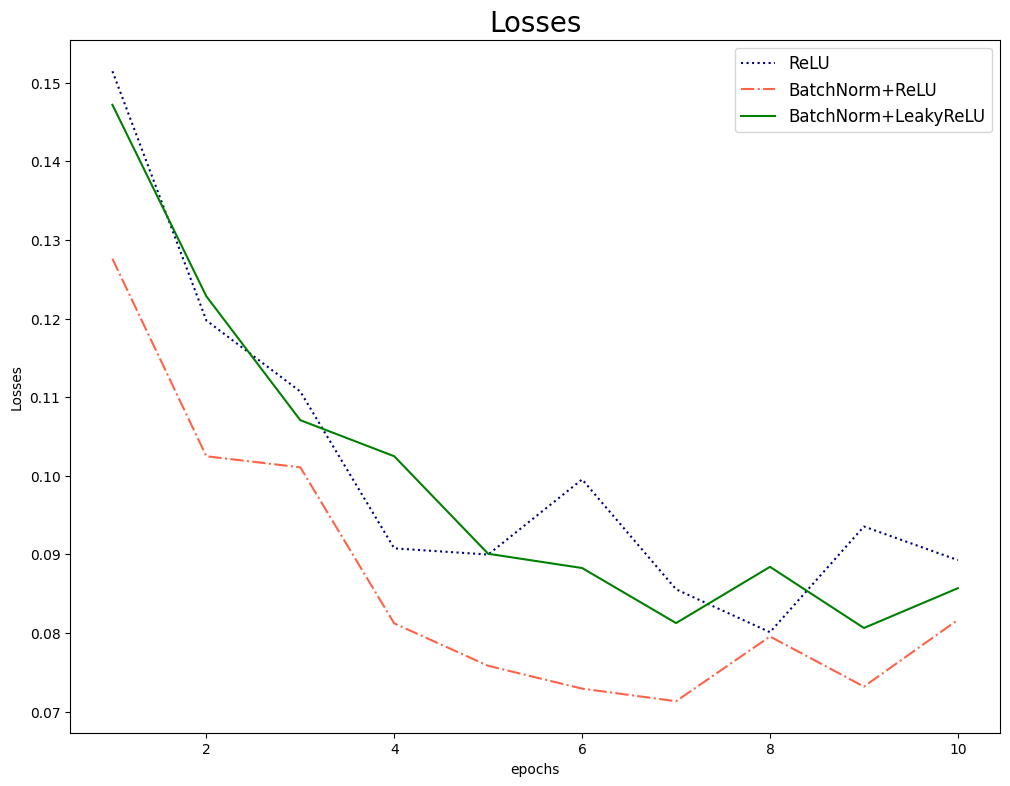

In [12]:
## 결과 시각화 통해 epoch별 검증 손실이 감소 추이 확인
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm+ReLU', 'BatchNorm+LeakyReLU'], fontsize=12)
plt.show()

>- mnist 데이터셋은 모델별 차이가 크지 않음
- 복잡한 데이터셋을 다룬다면 배치 정규화와 다른 활성화 함수를 적용해 보면서 모델의 훈련 추이를 관찰해볼 필요가 있음

## 3.6 모델 저장 및 불러오기


## 6-1 모델을 파일로 저장
- save(): 훈련을 종료해 가중치가 업데이터된 모델 인스턴스 저장


In [13]:
# 모델명을 h5 포맷으로 저장
model_b.save('h5-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 6-2 저장된 모델 복원
- 저장된 모델 복원

In [14]:
# 모델 복원
h5_model=tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

In [15]:
# 모델 검증 : 손실함수와 평가지표 계산
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.08167, acc: 0.97680


In [16]:
# 모델을 SavedModel 포맷으로 저장
model_b.save('saved-model')

In [17]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

In [18]:
#모델 검증 (HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5_model] loss: {loss:.5f}, acc: {acc:.5f}')

#모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose= 0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5_model] loss: 0.08167, acc: 0.97680
saved_model] loss: 0.08167, acc: 0.97680


## 3.7 복잡한 모델 생성
## 7-1 함수형 API(Functional API)
- 함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조 구현 가능
- 복잡한 구조의 모델 정의 가능

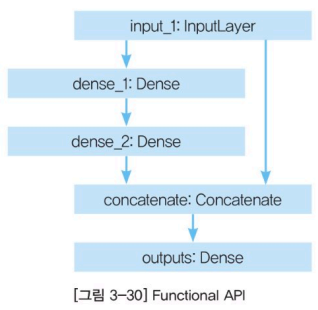

- 다중 입력, 다중 출력, 다중 배치 입력과 출력 공유하는 구조도 가능
- Sequential API를 사용하는 경우 단방향의 Sequential 모델만 구현한다는 제약


In [19]:
## Sequential API -> 함수형 API로 동일하게 구현
import tensorflow as tf

# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [20]:
#모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


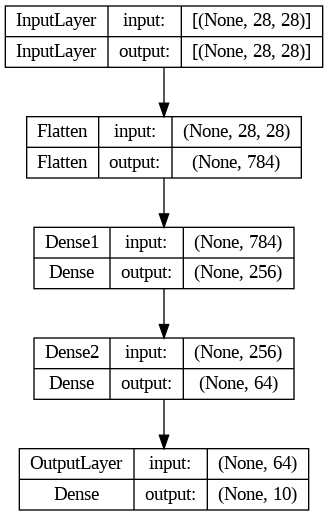

In [21]:
## plot_model(): model()보다 모델의 구조도 시각화 용이
from tensorflow.keras.utils import plot_model

#구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [22]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2146 - accuracy: 0.9361
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0891 - accuracy: 0.9730
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0599 - accuracy: 0.9811
Functional Model] loss: 0.08395, acc: 0.97300


## 7-2 모델 서브클래싱(Model Subclassing)
- 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수 있음




In [23]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    #초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(256, activation='relu')
    self.dense2 = tf.keras.layers.Dense(64, activation='relu')
    self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

  # method overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x): # fit() 호출되어 훈련하는 경우 호출될 함수
    # 순전파 정의, 모든 레이어를 체인처럼 연결
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [24]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_15 (Dense)            multiple                  200960    
                                                                 
 dense_16 (Dense)            multiple                  16448     
                                                                 
 dense_17 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2186 - accuracy: 0.9345
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0908 - accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0605 - accuracy: 0.9815
Subclassing Model] loss: 0.07824, acc: 0.97590


## 7-3 서브클래싱 모델 파라미터를 활용한 생성

In [26]:
class MyModel(tf.keras.Model):

  # 생성자 파라미터 추가
  def __init__(self, units, num_classes):
    super(MyModel, self).__init__()
    # 초기값 설정
    self.flatten=tf.keras.layers.Flatten()
    self.dense1=tf.keras.layers.Dense(units, activation='relu')
    self.dense2=tf.keras.layers.Dense(units/4, activation='relu')
    self.dense3=tf.keras.layers.Dense(num_classes, activation='softmax')

  # class overiding
  # 훈련용 함수 정의
  # x는 input
  def call(self, x):
    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    x=self.dense3(x)
    return x

In [27]:
## unit 개수를 입력받아 Dense 레이어의 유닛 개수 계산하여 설정
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  200960    
                                                                 
 dense_19 (Dense)            multiple                  16448     
                                                                 
 dense_20 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 동적으로 설정한 레이어의 파라미터가 초기화됨

In [28]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w.parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2142 - accuracy: 0.9364
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0878 - accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0601 - accuracy: 0.9809
Subclassing Model w.parameters] loss: 0.07958, acc: 0.97540
